# Assignment-2
- Narava Pranay manikanta
- MT50255
-Date 10/02/2022
- Due date: Oct. 3

Points: 95

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [ ]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

### 1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

In [ ]:
stocks = ['TSLA', 'AMZN','^GSPC']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 4, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  3 of 3 completed


In [ ]:
stock_price = stock_price.rename({'^GSPC' :'GSPC'},  axis='columns')

In [ ]:
stock_price = stock_price['Close']

In [ ]:
stock_price

,AMZN,TSLA,GSPC
Date,,,
2021-01-04,159.331497,243.256668,3700.649902
2021-01-05,160.925507,245.036667,3726.860107
2021-01-06,156.919006,251.993332,3748.139893
2021-01-07,158.108002,272.013336,3803.790039
2021-01-08,159.134995,293.339996,3824.679932
...,...,...,...
2021-03-25,152.313004,213.463333,3909.520020
2021-03-26,152.601501,206.236664,3974.540039
2021-03-29,153.786499,203.763336,3971.090088


In [ ]:
stock_price.describe()

,AMZN,TSLA,GSPC
count,61.000000,61.000000,61.000000
mean,158.512041,251.061967,3865.706899
std,5.446273,30.320144,71.221421
min,147.597504,187.666672,3700.649902
25%,154.474503,224.526672,3811.149902
50%,157.307007,251.993332,3875.439941
75%,163.447495,281.663330,3915.590088
max,169.000000,294.363342,3974.540039


In [ ]:
from fredapi import Fred
fred = Fred(api_key='6ccb16beac61c5faf11ec472657669e0')

In [ ]:
fred.search('T10Y3M')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
T10Y3M,Daily,D,T10Y3M,2022-09-30 16:01:09-05:00,Series is calculated as the spread between 10-...,2022-09-30,1982-01-04,93,2022-10-03,2022-10-03,Not Seasonally Adjusted,NSA,10-Year Treasury Constant Maturity Minus 3-Mon...,Percent,%


In [ ]:
risk_free = fred.get_series('T10Y3M')
risk_free

1982-01-04    2.32
1982-01-05    2.24
1982-01-06    2.43
1982-01-07    2.46
1982-01-08    2.50
              ... 
2022-09-26    0.49
2022-09-27    0.62
2022-09-28    0.32
2022-09-29    0.40
2022-09-30    0.50
Length: 10630, dtype: float64

In [ ]:
risk_free.describe()

count    10191.000000
mean         1.726070
std          1.105292
min         -0.960000
25%          0.850000
50%          1.730000
75%          2.610000
max          5.180000
dtype: float64

### 2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

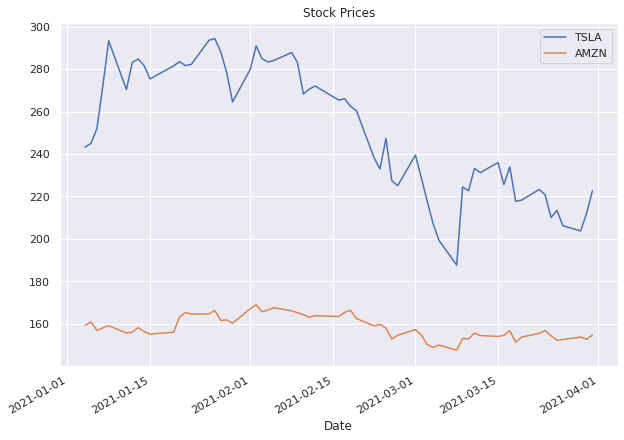

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
stock_price.loc[:,['TSLA', 'AMZN']].plot(ax = ax)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

In [ ]:
stock_price.corr()

,AMZN,TSLA,GSPC
AMZN,1.000000,0.817490,-0.076259
TSLA,0.817490,1.000000,-0.338915
GSPC,-0.076259,-0.338915,1.000000


In [ ]:
returns = stock_price.pct_change()
returns.dropna(inplace=True)
returns

,AMZN,TSLA,GSPC
Date,,,
2021-01-05,0.010004,0.007317,0.007083
2021-01-06,-0.024897,0.028390,0.005710
2021-01-07,0.007577,0.079447,0.014847
2021-01-08,0.006496,0.078403,0.005492
2021-01-11,-0.021519,-0.078214,-0.006555
2021-01-12,0.002126,0.047153,0.000416
2021-01-13,0.014438,0.005851,0.002276
2021-01-14,-0.012136,-0.011014,-0.003753
2021-01-15,-0.007425,-0.022296,-0.007190


In [ ]:
risk_free = risk_free['2021-01-01':'2021-04-01']
risk_free = risk_free/90 

In [ ]:
risk_free.dropna(inplace=True)
risk_free

2021-01-04    0.009333
2021-01-05    0.009667
2021-01-06    0.010556
2021-01-07    0.011000
2021-01-08    0.011667
                ...   
2021-03-26    0.018333
2021-03-29    0.018889
2021-03-30    0.019000
2021-03-31    0.019000
2021-04-01    0.018556
Length: 62, dtype: float64

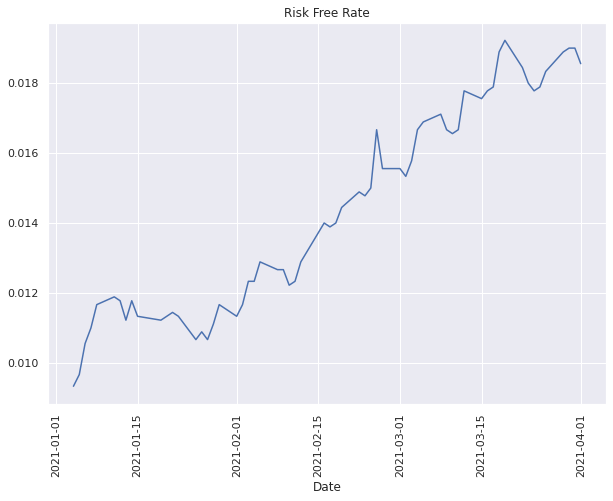

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(risk_free)
plt.title('Risk Free Rate')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
returns_risk_free = risk_free.pct_change()
returns_risk_free.dropna(inplace=True)
returns_risk_free

2021-01-05    0.035714
2021-01-06    0.091954
2021-01-07    0.042105
2021-01-08    0.060606
2021-01-11    0.019048
                ...   
2021-03-26    0.024845
2021-03-29    0.030303
2021-03-30    0.005882
2021-03-31    0.000000
2021-04-01   -0.023392
Length: 61, dtype: float64

In [ ]:
returns['excess_return_AMZN'] = returns['AMZN'] - risk_free
returns['excess_return_TSLA'] = returns['TSLA'] - risk_free
returns['excess_return_GSPC'] = returns['GSPC'] - risk_free

In [ ]:
returns.head()

,AMZN,TSLA,GSPC,excess_return_AMZN,excess_return_TSLA,excess_return_GSPC
Date,,,,,,
2021-01-05,0.010004,0.007317,0.007083,0.000338,-0.002349,-0.002584
2021-01-06,-0.024897,0.028390,0.005710,-0.035452,0.017835,-0.004846
2021-01-07,0.007577,0.079447,0.014847,-0.003423,0.068447,0.003847
2021-01-08,0.006496,0.078403,0.005492,-0.005171,0.066736,-0.006175
2021-01-11,-0.021519,-0.078214,-0.006555,-0.033408,-0.090103,-0.018444


## 3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

In [ ]:
import statsmodels.api as sm

In [ ]:
y = returns['excess_return_AMZN']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm = sm.OLS(y, X)
capm_result_AMZN = capm.fit()

In [ ]:
capm_result_AMZN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_AMZN   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     47.22
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           4.82e-09
Time:                        08:03:35   Log-Likelihood:                 177.53
No. Observations:                  60   AIC:                            -351.1
Df Residuals:                      58   BIC:                            -346.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.0886      0.158      6.871      0.000       0.771       1.406
const                 -0.0004      0.003     -0.160      0.873      -0.006       0.005
==============================================================================
Omnibus:                        0.612   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.619
Skew:                           0.227   Prob(JB):                        0.734
Kurtosis:                       2.797   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The P value is Zero so that we are rejecting the Null Hypothesis 
- implying that there is a correlation between the Excess Market return (S&P-500) and the Excess Amazon Stock Return

## The R-Square Value is 0.449
 - it implys that Excess market return (s&p-500) accounts for only 44% of the Changes in the Excess amazon stock return

## - The Slope coefficent of Beta is 1.0886 which is Greater than One 
- This Implys that Amazon Stock is Risker that the Market return of S&P-500 which means if S&P-500 market goes up by 1.0 percent the Amazon stock goes up by 1.08 percent

**Remark:** Please mention the level of significance at which you rejected the null hypothesis.\
(-5 Points)

In [ ]:
y= returns['excess_return_TSLA']
X = returns['excess_return_GSPC']

In [ ]:
X = sm.add_constant(X, prepend=False)
capm = sm.OLS(y, X)
capm_result_TSLA = capm.fit()

In [ ]:
capm_result_TSLA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     excess_return_TSLA   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     34.86
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           1.96e-07
Time:                        08:03:23   Log-Likelihood:                 112.56
No. Observations:                  60   AIC:                            -221.1
Df Residuals:                      58   BIC:                            -216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     2.7618      0.468      5.904      0.000       1.825       3.698
const                  0.0215      0.008      2.740      0.008       0.006       0.037
==============================================================================
Omnibus:                       26.627   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.008
Skew:                           1.179   Prob(JB):                     4.23e-18
Kurtosis:                       8.143   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The P value is Zero so that we are rejecting the Null Hypothesis 
- implying that there is a correlation between the Excess Market return (S&P-500) and the Excess Tesla Stock Return

## The R-Square Value is 0.375
 - it implys that Excess market return (s&p-500) accounts for only 37% of the Changes in the Excess amazon stock return

## - The Slope coefficent of Beta is 2.7618 which is Greater than One 
- This Implys that Tesla Stock is very Risker that the Market return of S&P-500 which means if S&P-500 market goes up by 1.0 percent the Amazon stock goes up by 2.76 percent

**Remark:** Please mention the level of significance at which you rejected the null hypothesis.

## Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude.

In [ ]:
betas = [capm_result_AMZN.params[0],
         capm_result_TSLA.params[0]]
betas

[1.088558144484175, 2.7618209490730523]

In [ ]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [ ]:
rf = risk_free.mean()
rm = returns['GSPC'].mean()

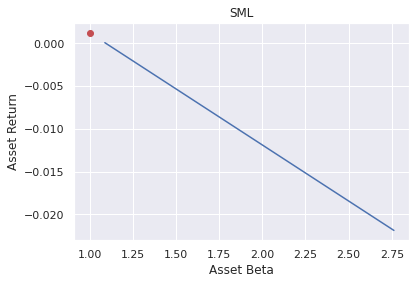

In [ ]:
SML(rf, rm, betas)

### The beta value is above the SML so that the stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice.

###  The return expectations for Stocks is
- Tesla   = 0.07
- Amazon  = 0.025 

In [ ]:
ret_exp = [0.0025, 0.7]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'ret_exp']
df_all.index = returns.columns[:2]
df_all

,betas,ret_exp
AMZN,1.088558,0.0025
TSLA,2.761821,0.7000


In [ ]:
def over_under_val(rf, rm, stock):
    x = rf + (rm - rf) * df_all['betas'].loc[stock]
    y = df_all['ret_exp'].loc[stock] 
    if x < y:
        print('The stock is underpriced')
    elif x > y:
        print('The stock is overpriced')
    else:
        print('The stock is fairly priced')     

In [ ]:
over_under_val(rf, rm, 'TSLA')

The stock is underpriced


In [ ]:
over_under_val(rf, rm, 'AMZN')

The stock is underpriced


## Sharpe ratio

In [ ]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
        # sharpe_ratios[i] = (returns.iloc[:,j].mean()-rf)/np.std(returns.iloc[:,j])
    return sharpe_ratios

**Remark:** The numerator on the RHS should be wrapped in the parenthesis before dividing.



In [ ]:
returns.columns[:2]

Index(['AMZN', 'TSLA'], dtype='object')

In [ ]:
stocks = returns.columns[:2]
sharpe_ratios = sharpe(stocks, rf, 2)
sharpe_ratios

{'AMZN': -0.8705747397393444, 'TSLA': -0.3084695764067234}

In [ ]:
print(min(sharpe_ratios, key=sharpe_ratios.get))
print(min(sharpe_ratios.values()))

AMZN
-0.8705747397393444


In [ ]:
print(max(sharpe_ratios, key=sharpe_ratios.get))
print(max(sharpe_ratios.values()))

TSLA
-0.3084695764067234


## Treynor ratio

In [ ]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_all['betas'][j]
    return treynor_ratios

**Remark:** The numerator on the RHS should be wrapped in the parenthesis before dividing.

In [ ]:
treynor_ratios = treynor(stocks, rf, 2)
treynor_ratios

{'AMZN': -0.013532738821524224, 'TSLA': -0.005615887108652933}

In [ ]:
print(min(treynor_ratios, key=treynor_ratios.get))
print(min(treynor_ratios.values()))

AMZN
-0.013532738821524224


In [ ]:
print(max(treynor_ratios, key=treynor_ratios.get))
print(max(treynor_ratios.values()))

TSLA
-0.005615887108652933


## The Most Feasiable stock is Tesla & least Feasiable stock is Amazon

## Both the stocks Amazon and the Tesla are Underpriced stocks 